<a href="https://colab.research.google.com/github/Natalya7oct/Feature-selection/blob/master/HW_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Математика для Data Science.
Домашнее задание №1.

In [35]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [37]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
x1 = df.iloc[0] # дом 1
x2 = df.iloc[1] # дом 2

In [44]:
scalar=0
for i in range(len(x1)):
  scalar=scalar+(x1[i]*x2[i])
print(scalar)

234704.86490859918


In [0]:
 df_new=df[['CRIM','INDUS']]

In [0]:
x3=df_new.iloc[0]
x4=df_new.iloc[1]

In [47]:
scalar_new=0
for i in range(len(x3)):
  scalar_new=scalar_new+(x3[i]*x4[i])
print(scalar_new)

16.3318725992


In [0]:
import matplotlib.pyplot as plt
import numpy as np

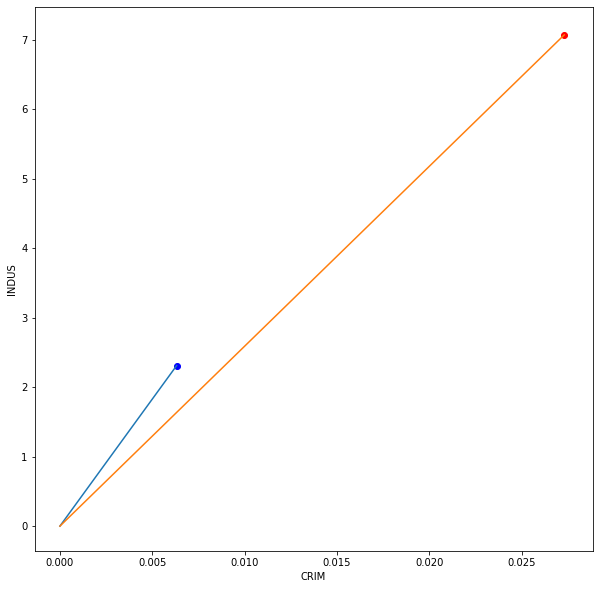

In [54]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()

x = np.array(df[['CRIM']])
y = np.array(df[['INDUS']])

ax.plot([0,x[0]], [0,y[0]])
ax.plot([0,x[1]], [0,y[1]])

ax.scatter(x[0], y[0], c='b', marker='o')
ax.scatter(x[1], y[1], c='r', marker='o')

ax.set_xlabel('CRIM')
ax.set_ylabel('INDUS')

plt.show()

Судя по графику, векторы довольно близки по углу, но сильно отличаются по размеру.
Скалярное произведение между ними - 16.3. Не пойму, как определить, много это или мало?

In [0]:
 df_super_new=df[['CRIM','INDUS','NOX']]

In [0]:
from mpl_toolkits.mplot3d import Axes3D

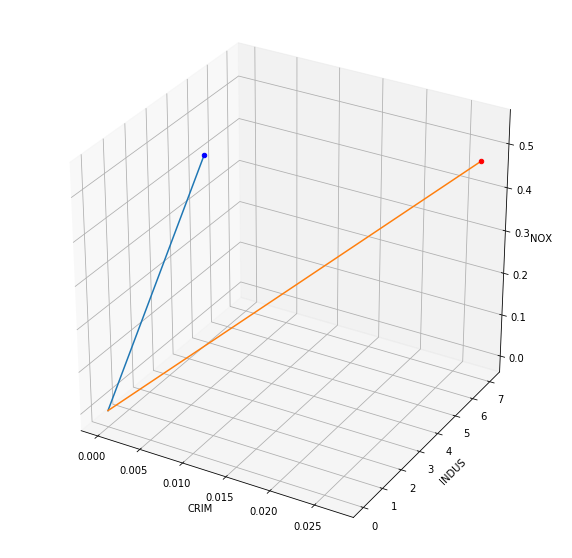

In [59]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

x = np.array(df_super_new['CRIM'])
y = np.array(df_super_new['INDUS'])
z = np.array(df_super_new['NOX'])

ax.plot([0,x[0]], [0,y[0]], [0,z[0]])
ax.plot([0,x[1]], [0,y[1]], [0,z[1]])

ax.scatter(x[0], y[0], z[0], c='b', marker='o')
ax.scatter(x[1], y[1], z[1], c='r', marker='o')

ax.set_xlabel('CRIM')
ax.set_ylabel('INDUS')
ax.set_zlabel('NOX')

plt.show()

In [0]:
import math

In [0]:
def len_x(x):
  return math.sqrt(x[0]*x[0]+x[1]*x[1])


In [0]:
cos_x3_x4=scalar_new/(len_x(x3)*len_x(x4))

In [68]:
cos_x3_x4

0.9999993650962177

In [0]:
dist_x3_x4=len_x(x4-x3)

In [74]:
dist_x3_x4

4.760046279197294

Задание повышенного уровня.

(-200, 200)

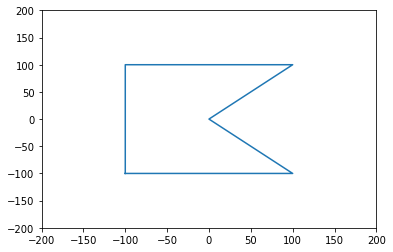

In [75]:
A = [
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [0, 0, 1],
    [100, -100, 1],
    [-100, -100, 1]
    ]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

Изменить положение объекта (сместить по оси x на 300 пикселей, по оси y на 200 пикселей)

In [0]:
# матрица смещения
S = [
    [1, 0, 300],
    [0, 1, 200],
    [0, 0, 1],
    ]

In [77]:
A1 = []
for point in A:
  new_point=np.dot(S,np.transpose(point))
  A1.append(new_point)
print(A1)

[array([200, 100,   1]), array([200, 300,   1]), array([400, 300,   1]), array([300, 200,   1]), array([400, 100,   1]), array([200, 100,   1])]


(-500, 500)

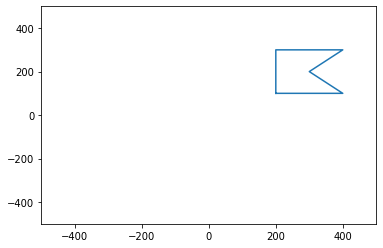

In [80]:
A1 = np.array(A1)
x = A1[:,0]
y = A1[:,1]
plt.plot(x, y)
plt.ylim([-500, 500])
plt.xlim([-500, 500])

Уменьшить объект в два раза.

In [0]:
# матрица масштабирования
S1 = [
    [0.5, 0, 0],
    [0, 0.5, 0],
    [0, 0, 1],
    ]

In [85]:
A2 = []
for point in A:
  new_point=np.dot(S1,np.transpose(point))
  A2.append(new_point)
print(A2)

[array([-50., -50.,   1.]), array([-50.,  50.,   1.]), array([50., 50.,  1.]), array([0., 0., 1.]), array([ 50., -50.,   1.]), array([-50., -50.,   1.])]


(-200, 200)

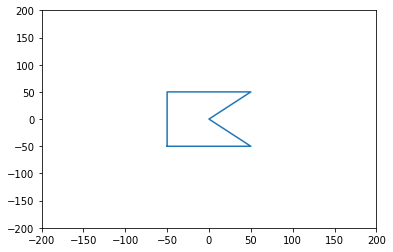

In [87]:
A2 = np.array(A2)
x = A2[:,0]
y = A2[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

Повернуть на 130 градусов.

In [0]:
from math import cos, sin, pi

In [0]:
# матрица поворота
theta = 130*pi/180
S2 = np.array([
    [cos(theta), sin(theta), 0],
    [-sin(theta), cos(theta), 0],
    [0, 0, 1]
])

In [103]:
A3 = []
for point in A:
  new_point=np.dot(S2,np.transpose(point))
  A3.append(new_point)
print(A3)

[array([-12.32568334, 140.88320528,   1.        ]), array([140.88320528,  12.32568334,   1.        ]), array([  12.32568334, -140.88320528,    1.        ]), array([0., 0., 1.]), array([-140.88320528,  -12.32568334,    1.        ]), array([-12.32568334, 140.88320528,   1.        ])]


(-200, 200)

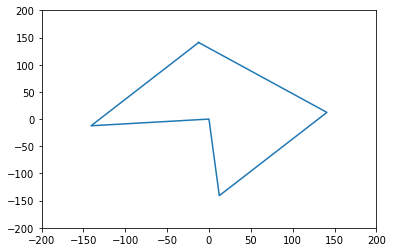

In [104]:
A3 = np.array(A3)
x = A3[:,0]
y = A3[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

По ощущениям, фигура деформируется. Почему так...? При повороте на pi и pi/2 такого не происходит.

Отразить объект относительно прямой y=x


In [0]:
# матрица отражения
S3 = [
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1],
    ]

In [106]:
A4 = []
for point in A:
  new_point=np.dot(S3,np.transpose(point))
  A4.append(new_point)
print(A4)

[array([-100, -100,    1]), array([ 100, -100,    1]), array([100, 100,   1]), array([0, 0, 1]), array([-100,  100,    1]), array([-100, -100,    1])]


(-200, 200)

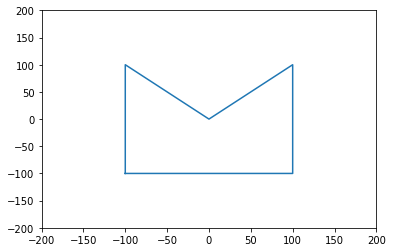

In [107]:
A4 = np.array(A4)
x = A4[:,0]
y = A4[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

Выполнить смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1,2)

In [0]:
S = np.array(S)
S1 = np.array(S1)
S4 = S.dot(S1)

In [113]:
A5 = []
for point in A:
  new_point=np.dot(S4,np.transpose(point))
  A5.append(new_point)
print(A5)

[array([250., 150.,   1.]), array([250., 250.,   1.]), array([350., 250.,   1.]), array([300., 200.,   1.]), array([350., 150.,   1.]), array([250., 150.,   1.])]


(-500, 500)

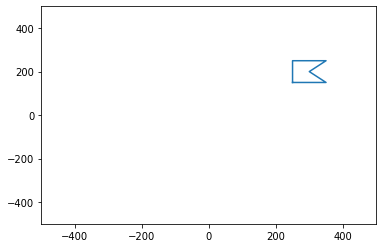

In [115]:
A5 = np.array(A5)
x = A5[:,0]
y = A5[:,1]
plt.plot(x, y)
plt.ylim([-500, 500])
plt.xlim([-500, 500])